<a href="https://colab.research.google.com/github/basmala-kamal/tut-pricing-model/blob/main/tinttut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup


In [1]:
import json
import pandas as pd
import re

# 1. Load the JSON file
with open("lip+tint.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to a pandas DataFrame for easier data manipulation
df = pd.DataFrame(data)
df = df.dropna(subset=["price"])
import time


# Define the function to scrape the brand name
def scrape_brand_name(session, url):
    try:
        if not url or not url.startswith("http"):  # Validate URL
            return None

        # Send a GET request to the URL using the session
        response = session.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for HTTP issues

        # Parse the page content with BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Adjust this selector based on the actual structure of the webpage
        brand_tag = soup.find("tr", class_="a-spacing-small po-brand")
        if brand_tag:
            td_tag = brand_tag.find("td", class_="a-span9")
            if td_tag:
                span_tag = td_tag.find("span", class_="a-size-base po-break-word")
                if span_tag:
                    return span_tag.get_text(strip=True)

        # Return None if the brand name is not found
        return None

    except requests.exceptions.RequestException as e:
        print(f"Network error scraping {url}: {e}")
        return None
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None

# Load the JSON file

"""
# Ensure the 'link' column exists and is valid
if "link" in df.columns:
    # Create a requests session
    with requests.Session() as session:
        # Set a User-Agent header to mimic a browser (optional but recommended)
        session.headers.update({
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
        })

        # Apply the scraping function to the 'link' column
        brand_names = []
        for idx, url in enumerate(df["link"]):
            print(f"Scraping {idx + 1}/{len(df)}: {url}")
            brand_name = scrape_brand_name(session, url)
            brand_names.append(brand_name)

            # Throttle requests to avoid getting blocked
            time.sleep(2)

        # Add the scraped brand names to the DataFrame
        df["brand_name"] = brand_names"""


def clean_price(price_str):
    if price_str is None:
        return None
    numeric_str = re.sub(r"[^\d\.]", "", price_str)
    try:
        return float(numeric_str)
    except ValueError:
        return None

df["price_numeric"] = df["price"].apply(clean_price)


def clean_rating(rating_str):
    if rating_str is None:
        return None


    match = re.search(r"\d+(\.\d+)?", rating_str)
    if match:
        try:
            return float(match.group(0))
        except ValueError:
            return None
    return None


df["rating_numeric"] = df["rating"].apply(clean_rating)


def remove_duplicates_by_name_and_price(df):
    # Sort the DataFrame to keep the first occurrence of each duplicate
    df = df.sort_values(by=["title", "price_numeric"])

    # Drop duplicates based on 'name' and 'price_numeric'
    df = df.drop_duplicates(subset=["title", "price_numeric"], keep="first")

    return df

# Apply the duplicate removal function to the DataFrame
df = remove_duplicates_by_name_and_price(df)
# ------------------------------------------------------------------------------
# Final cleaned DataFrame
df = df[~df["title"].str.contains("تحديد|زيت|أحمر شفاه|احمر شفاه", na=False)]
print(df)


                                                 title         price  \
39                  Dg0034 لون بني من داروجي، غير لامع   ‏22.99 ريال   
14   Peach C River Glow Korean Lip Tint – Premium K...   ‏40.00 ريال   
2    River Glow Korean Lip Tint 03 – Premium Korean...   ‏40.00 ريال   
187  آيام ميم ملون جل مائي - حلقة مفاتيح ملونة | هد...   ‏66.21 ريال   
163              اتود قلم ماركر تينت من دير دارلينج #2  ‏104.00 ريال   
..                                                 ...           ...   
164  واو! مجموعة قناع ملمع شفاه قابل للتقشير للنساء...   ‏87.00 ريال   
246                               ياده - بي ماي تنت 01   ‏39.00 ريال   
197                         ياده - بي ماي تنت 02، لامع   ‏41.00 ريال   
239                     ياده - بي ماي تنت 04، غير لامع   ‏33.97 ريال   
51   يو ان بي اي صبغة ستاي بلومينج تينت للشفاه والخ...   ‏39.43 ريال   

            rating                                               link  \
39   5.0 من 5 نجوم  https://www.amazon.sa/%D8%A7%D9%84%D8%B4%D

In [2]:
df

,title,price,rating,link,price_numeric,rating_numeric
39,Dg0034 لون بني من داروجي، غير لامع,‏22.99 ريال,5.0 من 5 نجوم,https://www.amazon.sa/%D8%A7%D9%84%D8%B4%D9%81...,22.99,5.0
14,Peach C River Glow Korean Lip Tint – Premium K...,‏40.00 ريال,3.8 من 5 نجوم,https://www.amazon.sa/%D8%A7%D9%84%D8%B4%D9%81...,40.00,3.8
2,River Glow Korean Lip Tint 03 – Premium Korean...,‏40.00 ريال,4.3 من 5 نجوم,https://www.amazon.sa/%D8%A7%D9%84%D8%B4%D9%81...,40.00,4.3
187,آيام ميم ملون جل مائي - حلقة مفاتيح ملونة | هد...,‏66.21 ريال,4.3 من 5 نجوم,https://www.amazon.sa/%D8%A7%D8%AA%D9%88%D8%AF...,66.21,4.3
163,اتود قلم ماركر تينت من دير دارلينج #2,‏104.00 ريال,4.2 من 5 نجوم,https://www.amazon.sa/%D8%A7%D9%84%D8%B4%D9%81...,104.00,4.2
...,...,...,...,...,...,...
164,واو! مجموعة قناع ملمع شفاه قابل للتقشير للنساء...,‏87.00 ريال,3.2 من 5 نجوم,https://www.amazon.sa/%D8%A7%D9%84%D8%B4%D9%81...,87.00,3.2
246,ياده - بي ماي تنت 01,‏39.00 ريال,3.7 من 5 نجوم,https://www.amazon.sa/%D9%83%D9%88%D9%84%D9%88...,39.00,3.7
197,ياده - بي ماي تنت 02، لامع,‏41.00 ريال,3.9 من 5 نجوم,https://www.amazon.sa/%D8%A7%D8%AA%D9%88%D8%AF...,41.00,3.9
239,ياده - بي ماي تنت 04، غير لامع,‏33.97 ريال,4.2 من 5 نجوم,https://www.amazon.sa/%D9%83%D9%88%D9%84%D9%88...,33.97,4.2


In [3]:

def adjust_price_for_sets(df):
    def update_price(row):
        title = row["title"]

        # Case 1: Contains 'مجموعة' and 'قطع'
        if "مجموعة" in title and "قطع" in title:
            match = re.search(r'(\d+)\s*قطع', title)
            if match:
                num_items = int(match.group(1))
                if num_items > 0 and pd.notna(row["price_numeric"]):
                    return row["price_numeric"] / num_items

        # Case 2: Contains 'قطعتين' or 'زجاجتين'
        if re.search(r'(عبوتان|قطعتين|زجاجتين)', title):
            if pd.notna(row["price_numeric"]):
                return row["price_numeric"] / 2
        match = re.search(r'(\d+)\s*قوارير', title)
        if match:
            num_items = int(match.group(1))
            if num_items > 0 and pd.notna(row["price_numeric"]):
                return row["price_numeric"] / num_items
        match = re.search(r'عدد\s*(\d+)', title)
        if match:
            num_items = int(match.group(1))
            if num_items > 0 and pd.notna(row["price_numeric"]):
                return row["price_numeric"] / num_items
        match = re.search(r'(\d+)\s*(?:ألوان|الوان)', title)
        if match:
          num_items = int(match.group(1))
          if num_items > 0 and pd.notna(row["price_numeric"]):
              return row["price_numeric"] / num_items


        # If no adjustments, return the original price
        return row["price_numeric"]

    # Apply the function to the 'price_numeric' column
    df["price_numeric"] = df.apply(update_price, axis=1)
    return df

# Apply the function to your DataFrame
df = adjust_price_for_sets(df)

# Example: Verify with updated rows that match 'مجموعة', 'قطعتين', or 'زجاجتين'
print(df[df["title"].str.contains("مجموعة|قطعتين|زجاجتين")])


                                                 title         price  \
234  اكسيفور ملون شفاه عالي الصبغة، مرطب يدوم طويلا...   ‏50.40 ريال   
158  تاتو وملمع شفاه قابلة للتقشير ومقاوم للماء للن...   ‏65.30 ريال   
99   سولي مجموعة ملمع شفاه كوري سائل صغير من 6 الوا...   ‏75.07 ريال   
150  سيوسى مجموعة ملون شفاه من 6 الوان - احمر سائل ...   ‏39.90 ريال   
245  مجموعة صبغات شفاه كورية من 6 الوان احمر سائل ص...  ‏101.12 ريال   
40   مجموعة صبغة شفاه مكونة من 6 الوان ملمع قابل لل...   ‏41.90 ريال   
25   مجموعة ملمع شفاه سائل زاهي ومشرق من اربع الوان...   ‏49.99 ريال   
31   مجموعة ملمع شفاه كوري سائل مات غير لامع يدوم ط...   ‏44.91 ريال   
248  مجموعة ملمع شفاه كوري من 6 الوان متين ومقاوم ل...  ‏102.28 ريال   
268  مجموعة ملمع شفاه من 3 الوان احمر مخملي مائي صغ...   ‏59.89 ريال   
287  مجموعة ملمع شفاه هارت بينك من 6 قطع، ألوان ناب...   ‏53.10 ريال   
224  مجموعة ملمع شفاه يو ار ماجيكال للاطفال والفتيا...  ‏115.00 ريال   
271  ملمع شفاه مجموعة شاين 3 ألوان لمسة نهائية زجاج...   ‏89.99 

In [4]:
df_cleaned = (
    df[["title", "price_numeric", "rating_numeric"]]
    .dropna(subset=["title", "price_numeric", "rating_numeric"])
)

df_cleaned.shape


(109, 3)

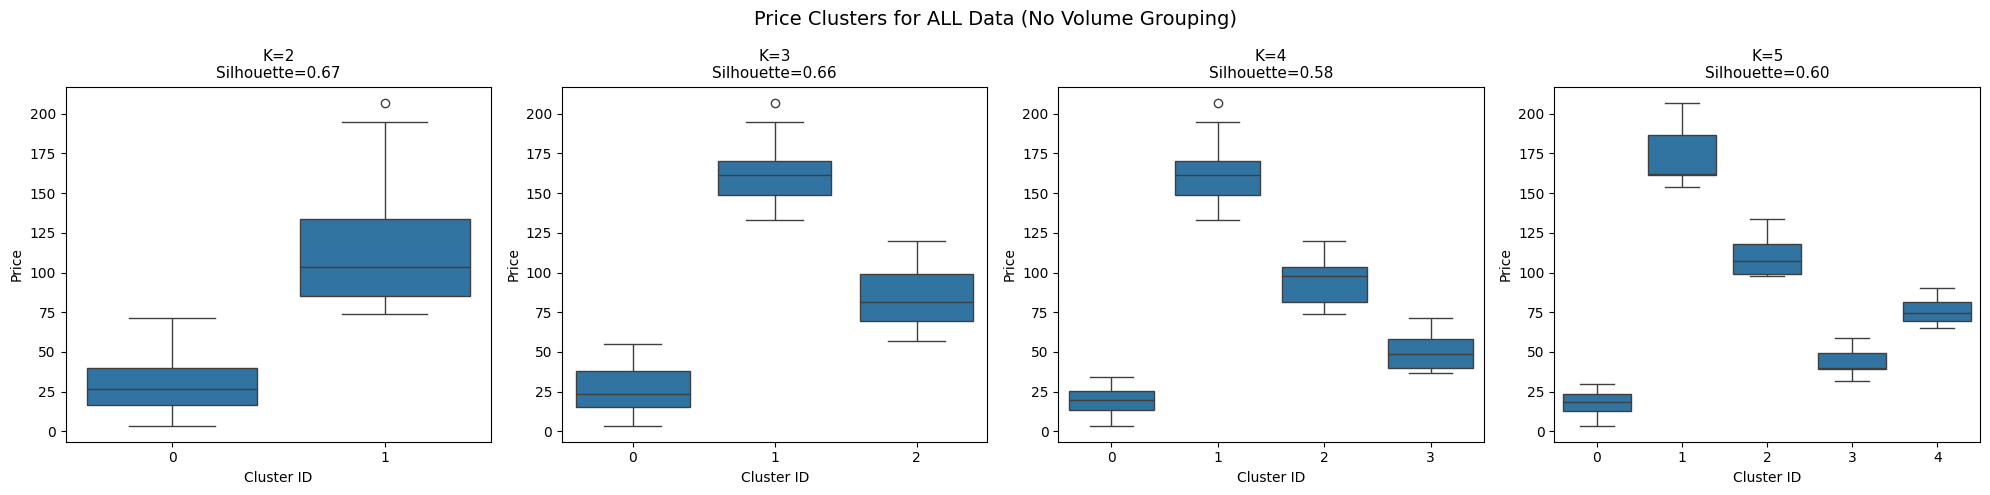

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
# 2) Check if we have enough data
if len(df_cleaned) <= 1:
    print("Not enough rows to do clustering.")
else:
    X_price = df_cleaned[["price_numeric"]].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_price)

    # Create figure with 4 subplots (one for each K)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

    for idx, k in enumerate([2, 3, 4, 5]):
        if len(df_cleaned) < k:
            print(f"Skipping k={k} due to insufficient data.")
            continue

        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(X_scaled)

        # Create a column name for these cluster labels
        cluster_col = f"cluster_k{k}"
        df_cleaned[cluster_col] = kmeans.labels_

        # Calculate silhouette score (if there's more than 1 cluster)
        if len(df_cleaned[cluster_col].unique()) > 1:
            sil_score = silhouette_score(X_scaled, kmeans.labels_)
        else:
            sil_score = np.nan

        # 3) Boxplot of price vs cluster
        sns.boxplot(
            x=cluster_col,
            y="price_numeric",
            data=df_cleaned,
            ax=axes[idx]
        )
        axes[idx].set_title(f"K={k}\nSilhouette={sil_score:.2f}", fontsize=11)
        axes[idx].set_xlabel("Cluster ID")
        axes[idx].set_ylabel("Price")

    plt.suptitle("Price Clusters for ALL Data (No Volume Grouping)", fontsize=14)
    plt.subplots_adjust(top=0.85)
    plt.tight_layout()
    plt.show()


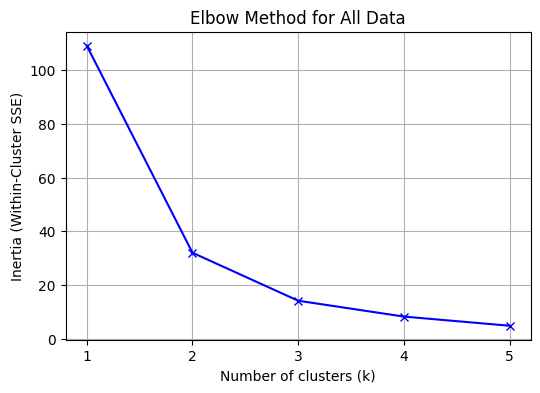

In [6]:
if len(df_cleaned) <= 1:
    print("Only one or zero rows for entire dataset. Skipping elbow method.")
else:
    # Extract all price values
    X_price = df_cleaned[["price_numeric"]].values

    # Scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_price)

    # 3) Apply Elbow method
    distortions = []
    K_range = range(1, 6)  # Try k = 1..5 (adjust if needed)
    for k in K_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans_temp.fit(X_scaled)
        distortions.append(kmeans_temp.inertia_)

    # 4) Plot Elbow curve
    plt.figure(figsize=(6, 4))
    plt.plot(K_range, distortions, 'bx-')
    plt.title('Elbow Method for All Data')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Within-Cluster SSE)')
    plt.xticks(K_range)  # Show integer ticks
    plt.grid(True)
    plt.show()

In [7]:
X_price = df_cleaned[["price_numeric"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_price)


k = 4
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
kmeans.fit(X_scaled)

# Store cluster labels
df_cleaned["final_cluster"] = kmeans.labels_

# 4) Inspect cluster means, counts, etc.
summary = (
    df_cleaned
    .groupby("final_cluster")["price_numeric"]
    .agg(["count", "mean", "min", "max"])
)
print(summary)

               count        mean         min     max
final_cluster                                       
0                 53   19.692320    3.641429   34.00
1                  8  163.425000  133.080000  206.83
2                 19   94.167368   74.010000  119.99
3                 29   50.183793   37.000000   71.12


In [8]:

summary["price_range"] = summary["max"] - summary["min"]

# Sort the summary by price_range in descending order
sorted_summary = summary.sort_values(by="price_range", ascending=False)

# Display the sorted summary
print(sorted_summary)


               count        mean         min     max  price_range
final_cluster                                                    
1                  8  163.425000  133.080000  206.83    73.750000
2                 19   94.167368   74.010000  119.99    45.980000
3                 29   50.183793   37.000000   71.12    34.120000
0                 53   19.692320    3.641429   34.00    30.358571


sheglam, chinese, very drugstore, non original products

In [9]:

regular_low = df_cleaned[
    (df_cleaned["final_cluster"] == 0)
]
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
price_std = regular_low["price_numeric"].std()
print(price_std)
regular_low


7.936792405587935


,title,price_numeric,rating_numeric,cluster_k2,cluster_k3,cluster_k4,cluster_k5,final_cluster
39,Dg0034 لون بني من داروجي، غير لامع,22.990000,5.0,0,0,0,0,0
7,اتود ملون شفاه مائي من دير دارلينج #5 جريب ادي بالوان زاهية مع لمسة نهائية مرطبة وخفيفة الوزن وغير لزجة مقاوم للتلطخ وخفيف كيه بيوتي,11.050000,4.0,0,0,0,0,0
151,اتود ملون مائي من هاوس - ستروبيري اديه، 9 غرام، ناعم,27.980000,1.0,0,0,0,0,0
234,اكسيفور ملون شفاه عالي الصبغة، مرطب يدوم طويلا بلمسة نهائية غير لزجة لترطيب شفتيك، عبوة من قطعتين، 0.4 اونصة سائلة,25.200000,1.0,0,0,0,0,0
96,ايتود هاوس ملون شفاه مائي من دير دارلينج، 03 برتقالي,27.000000,3.8,0,0,0,0,0
24,ايتود هاوس واتر تنت اورنج,14.980000,4.4,0,0,0,0,0
22,ايسنس ملون شفاه مرطب من تينتيد كيس 102,11.120000,4.7,0,0,0,0,0
123,بلسم غلاستينغ ميلتينغ بالم من روم اند ان دي 3.5 جرام (7 ألوان) لامع، يضخم الشفاه ويرطبها، شفاف مائي، عالي الصبغة، نباتي (09 بيونيز),3.641429,4.3,0,0,0,0,0
73,بلسم ملمع زائب غلاستنج من روم اند ان دي 3.5 غرام (7 الوان)، لامع، شفاه، رطب، شفاف، مقاوم للماء، عالي الصبغة، نباتي (06 كايا فيج),3.641429,4.4,0,0,0,0,0
158,تاتو وملمع شفاه قابلة للتقشير ومقاوم للماء للنساء والفتيات من كوكوبيرد - مجموعة 6 قطع - طبيعي,10.883333,3.3,0,0,0,0,0


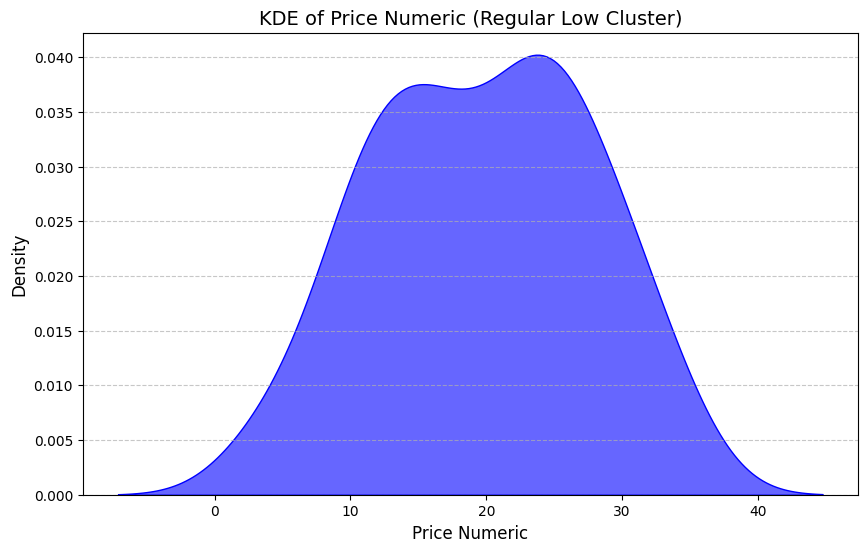

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=regular_low["price_numeric"],
    fill=True,
    color="blue",
    alpha=0.6
)

# Add labels and title
plt.title("KDE of Price Numeric (Regular Low Cluster)", fontsize=14)
plt.xlabel("Price Numeric", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


premium korean, elf and other american and imported

In [11]:
regular_mid = df_cleaned[
    (df_cleaned["final_cluster"] == 2)
]
pd.set_option('display.max_colwidth', None)

price_std = regular_mid["price_numeric"].std()
print(price_std)
regular_mid


15.021280771738201


,title,price_numeric,rating_numeric,cluster_k2,cluster_k3,cluster_k4,cluster_k5,final_cluster
163,اتود قلم ماركر تينت من دير دارلينج #2,104.00,4.2,1,2,2,2,2
55,ان واي اكس بروفشنال ميكاب ملمع شفاه مرطب ليب اي في، ملمع شفاه، ترطيب يصل الى 12 ساعة، صبغة عالية، لمسة نهائية لامعة رطبة، بابلجام بيرست,76.30,4.5,1,2,2,4,2
42,ان واي اكس بروفشنال ميكاب ملمع شفاه مرطب من ليب اي في، ملمع شفاه، ترطيب يصل الى 12 ساعة، صبغة عالية، لمسة نهائية لامعة رطبة، دريبين ان روز,74.01,4.7,1,2,2,4,2
188,باري إم - وجه منعش - ملمع للخدود والشفاه وردي عميق,81.58,4.1,1,2,2,4,2
78,بريبيرا ملون شفاه مخملي من انك ايري (0.14 اونصة سائلة) | عالي التصبغ، خفيف الوزن، ناعم، مرطب، لم يتم اختباره على الحيوانات| (#021 فلافي بيتش),99.00,4.1,1,2,2,2,2
256,بنفت شاشا تينت تشيك آند ليب ستاين - 10 مل، شفاف,90.00,3.9,1,2,2,4,2
262,بيري بيرا تنت الشفاه، فلفت 017 روزي نود,103.50,4.1,1,2,2,2,2
159,بيري بيرا تنت الشفاه، مود قلوي 02 كورال انفلونسر,99.03,4.3,1,2,2,2,2
165,دكتور بلسم ملون باوباو فائق مرطب، احمر، 25 مل,77.00,4.1,1,2,2,4,2
204,صبغة سوبر فود تينت من دكتور ليب، 3 عبوات للشفاه والخدود والجفون,117.20,4.3,1,2,2,2,2


french, american, high end korean

In [12]:
regular_high = df_cleaned[
    (df_cleaned["final_cluster"] == 1)
]
pd.set_option('display.max_colwidth', None)

price_std = regular_high["price_numeric"].std()
print(price_std)
regular_high


26.105042753132143


,title,price_numeric,rating_numeric,cluster_k2,cluster_k3,cluster_k4,cluster_k5,final_cluster
215,اميوز صبغة جل فيت من سيول (06 سيول جيرل)، لامع,195.00,4.1,1,1,1,1,1
254,بينيفت صبغة للشفاه والخدود، بلايتينت (بينك - ليموناد),161.00,4.4,1,1,1,1,1
214,تنت جوجو للشفاه والخدود ملون بلون الكرز اللامع من بنفت، 5.68 مل، ستان,161.53,4.3,1,1,1,1,1
286,صبغة الشفاه «اكسترا» من بوبي براون، شديد التحدر,206.83,5.0,1,1,1,1,1
104,قلم صبغ الشفاه والخدود باللون الوردي من بينفت- (pink)، شير، زهري,154.00,4.1,1,1,1,1,1
10,قناع شفاه وندر بلادينج من وندرسكين، غير لامع,133.08,3.8,1,1,1,2,1
178,كلارنس 03 واتر ريد، غير لامع,162.00,4.1,1,1,1,1,1
218,كولورجرام ملمع شفاه فروتي جلاس من نوفيمل | شفاف لامع مع جليتر زهري رقيق قابل للبناء وقابل للمزج للحصول على تاثير متوهج ولامع 0.11 اونصة,133.96,4.1,1,1,1,2,1


mid korean

In [13]:
mid_low = df_cleaned[
    (df_cleaned["final_cluster"] == 3)
]
pd.set_option('display.max_colwidth', None)


mid_low


,title,price_numeric,rating_numeric,cluster_k2,cluster_k3,cluster_k4,cluster_k5,final_cluster
14,Peach C River Glow Korean Lip Tint – Premium Korean Lip Stain – Transparent Water Gel Tint – Natural-Looking Lip Tint Korean Water Tint – Long-Lasting High Color – Extra Glossiness (Breeze Fig),40.00,3.8,0,0,3,3,3
2,River Glow Korean Lip Tint 03 – Premium Korean Lip Stain – Transparent Water Gel Tint – Natural-Looking Lip Tint Korean Water Tint – Long-Lasting High Color – Extra Glossiness (Let's Grape),40.00,4.3,0,0,3,3,3
187,آيام ميم ملون جل مائي - حلقة مفاتيح ملونة | هدية، صبغة عالية، يدوم طويلا، مناسب للسفر، لون 06 ماي تشيري، 0.09 اونصة، نصف غير لامع,66.21,4.3,0,2,3,4,3
115,احمر خدود وشفاه من بنفت - لوف تينت,70.00,4.3,0,2,3,4,3
108,اكسيفور ملمع شفاه ثلاثي من الجل المائي ملون لامع ومرطب عالي الصبغة ويدوم طويلا مكياج مرطب وخفيف الوزن,56.66,1.0,0,2,3,3,3
113,ان واي اكس بروفشنال ميكاب ملمع شفاه مرطب ليب اي في، ملمع شفاه، ترطيب يصل الى 12 ساعة، صبغة عالية، لمسة نهائية لامعة رطبة، برست ذات تانغ!,68.98,3.6,0,2,3,4,3
69,ان واي اكس بروفشنال ميكاب ملمع شفاه مرطب ليب اي في، ملمع شفاه، ترطيب يصل الى 12 ساعة، صبغة عالية، لمسة نهائية لامعة رطبة، جريب جوشين,71.12,3.0,0,2,3,4,3
57,بلو نكتار ملون شفاه وخدود وعيون | بخير السمن المغذي وزبدة الشيا واللوتس | ملون شفاه بنكهات متعددة | خالي من الكبريتات والبارابين (10 جرام) قطعة واحدة (عبوة من قطعة واحدة) لوتس نود، غير لامع,48.00,4.4,0,0,3,3,3
23,بيري بيرا تنت الشفاه، مود قلوي 03 روز ان مايند,50.99,4.4,0,0,3,3,3
26,تنت بوت للشفاه خفيف الوزن من ميكاب ريفولوشن، لون قابل للزيادة فوقه، تركيبة مرطبة مع لمسة نهائية لامعة للبقع، أحمر سيزلين، 3 مل,49.00,3.6,0,0,3,3,3


Recommended B2C Price: 19 RAS



Recommended B2B Price: 9.5 RAS, assuming a retailer's margin of 50%
